In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import catboost as cb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv')
df.head(100)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
95,2023,EN,FT,Data Engineer,25000,EUR,26827,DE,L
96,2023,EN,FT,BI Developer,160000,USD,160000,US,M
97,2023,EN,FT,BI Developer,100000,USD,100000,US,M
98,2023,EN,FT,Big Data Engineer,130000,USD,130000,SE,S


Since most data is categorical form we should use catboost compared to xgboost

In [3]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

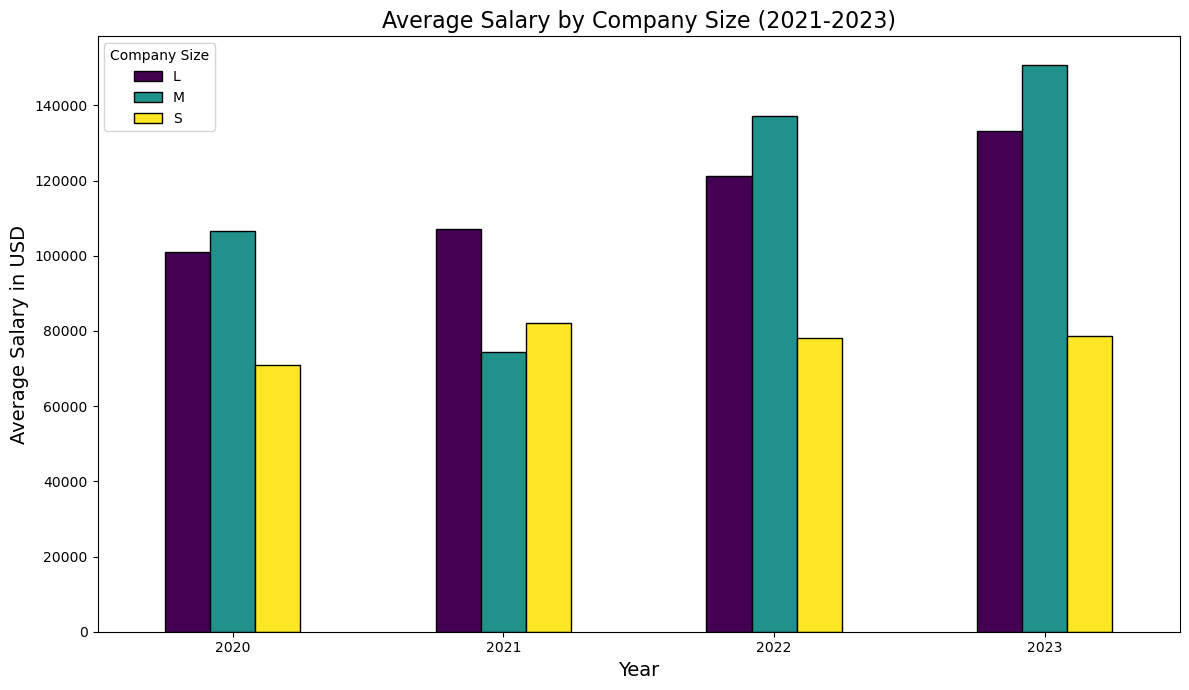

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_salary_by_company_size = df.groupby(["work_year", "company_size"])["salary_in_usd"].mean().unstack()

# Plotting
plt.figure(figsize=(12, 7))
avg_salary_by_company_size.plot(kind='bar', ax=plt.gca(), colormap='viridis', edgecolor='black')

# Set plot title and labels
plt.title("Average Salary by Company Size (2021-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Salary in USD", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Company Size")
plt.tight_layout()

plt.show()

In [5]:
cat_col = df.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,cat_col)
]
                               )

In [6]:

X = df.drop(['salary','salary_in_usd'],axis=1)
y = df['salary_in_usd']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [7]:
my_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',cb.CatBoostRegressor(verbose=0))

])

In [8]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'company_location', 'company_size'],
      dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7c3ff37c79d0>)])

In [9]:
my_pipeline.score(X_test,y_test)

0.40179833180568714

In [10]:
import xgboost as xg
my_pipeline2 = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',xg.XGBRegressor(verbose=0))

])

In [11]:
my_pipeline2.fit(X_train,y_train)

[06:37:37] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'company_location', 'company_size'],
      dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_byleve...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [12]:
my_pipeline2.score(X_test,y_test)

0.3848908479097868